Here we are going to generate DP histograms usign differents approaches

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random 
import sklearn

In [2]:
#Importing the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()
data=pd.DataFrame(iris['data'],columns=iris['feature_names'])
data['species']=iris['target']

In [3]:
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0  
1          0  
2          0  
3          0  
4          0  
..       ...  
145        2  
146        2  
147        2  
148        2  
149        2  

[150 rows x 5 columns]

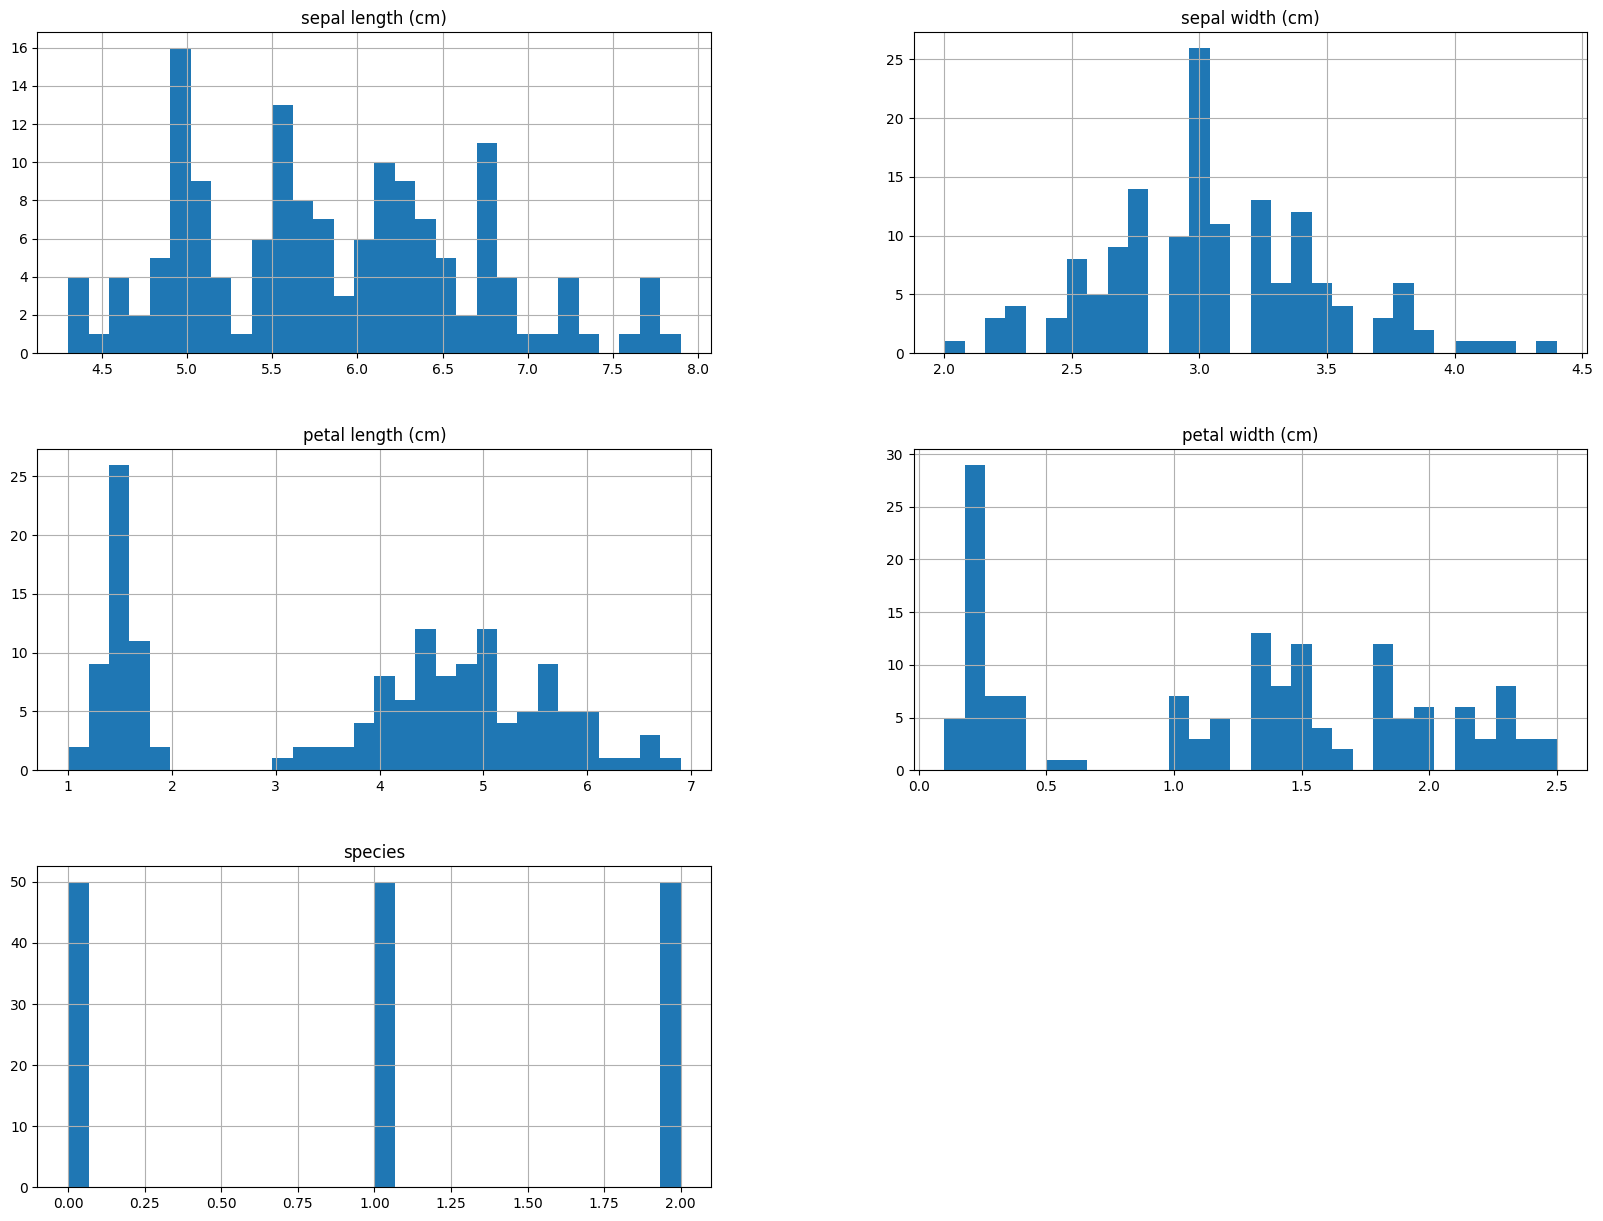

In [9]:
#Histogram of every feature
data.hist(bins=30, figsize=(20,15))
plt.show()

Naive implementation

In [41]:
#Getting 
ax = plt.hist(data, bins=50)
plt.close()
freqs = ax[0]
intervals = ax[1]

In [45]:
ax[1]

array([0.   , 0.158, 0.316, 0.474, 0.632, 0.79 , 0.948, 1.106, 1.264,
       1.422, 1.58 , 1.738, 1.896, 2.054, 2.212, 2.37 , 2.528, 2.686,
       2.844, 3.002, 3.16 , 3.318, 3.476, 3.634, 3.792, 3.95 , 4.108,
       4.266, 4.424, 4.582, 4.74 , 4.898, 5.056, 5.214, 5.372, 5.53 ,
       5.688, 5.846, 6.004, 6.162, 6.32 , 6.478, 6.636, 6.794, 6.952,
       7.11 , 7.268, 7.426, 7.584, 7.742, 7.9  ])

In [27]:
#Make a dataframe with the frequency of each interval considerinf the columns of the dataframe
columns = data.columns
freqs_df = pd.DataFrame(np.transpose(freqs), columns=columns)

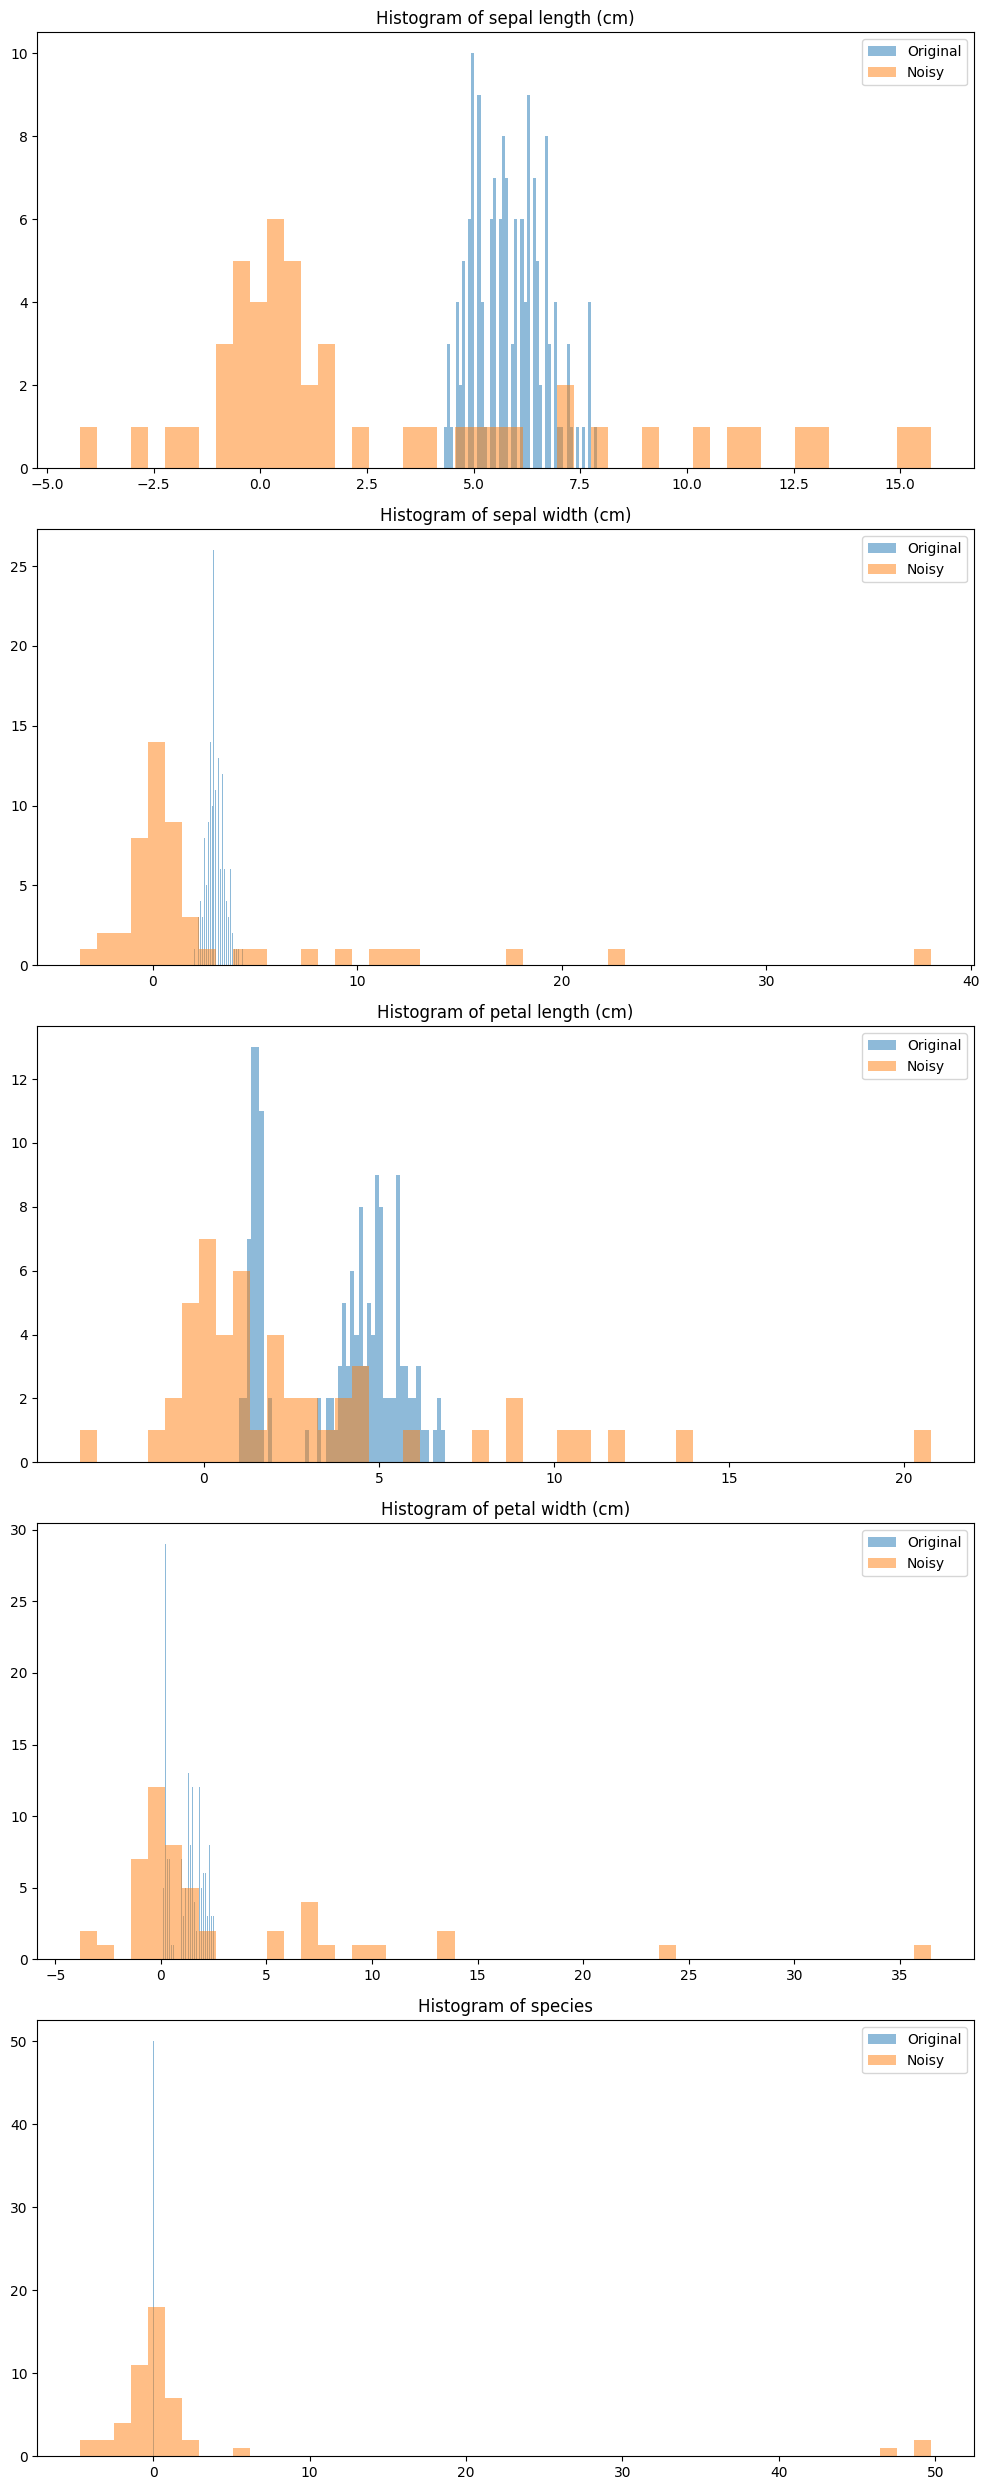

In [39]:
#We are goinf to be adding noise to the bins of the histogram
epsilon=1
f = lambda x: x + np.random.laplace(loc=0, scale=1/epsilon)
#Apply lambda for every data point in the dataframe
noisy_freqs_df = freqs_df.applymap(f)

# Plotting original and noisy histograms for each column
num_columns = len(columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(10, 5*num_columns))

for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(data[column], bins=50, alpha=0.5, label='Original')
    ax.hist(noisy_freqs_df[column], bins=50, alpha=0.5, label='Noisy')
    ax.set_title(f'Histogram of {column}')
    ax.legend()

plt.tight_layout()
plt.show()

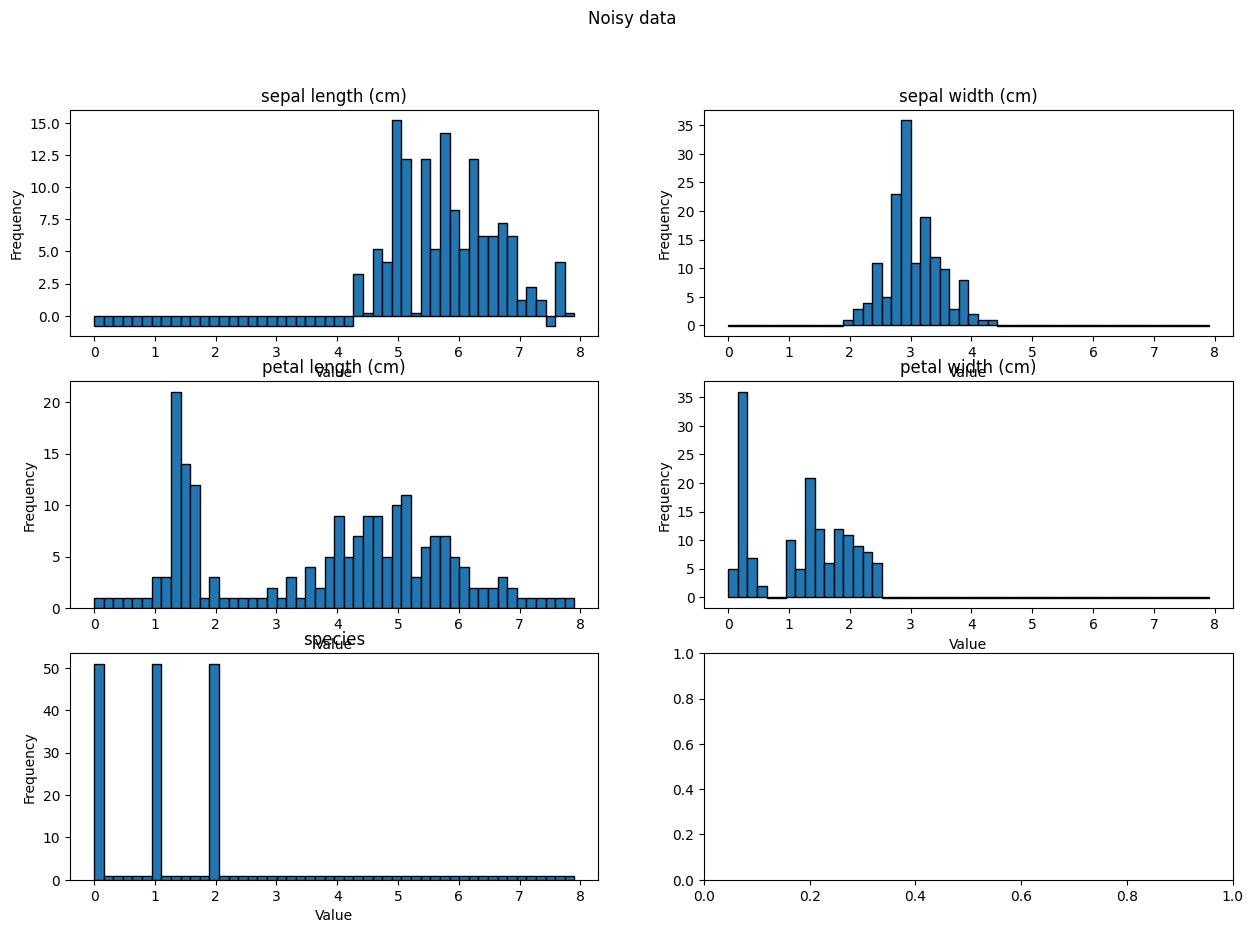

In [17]:
#Ploting a bar plot of every feature with the noisy data and using the intervals as the x axis
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Noisy data')
for i in range(len(columns)):
    ax[i//2, i%2].bar(intervals[:-1], noisy_freqs[i], width=np.diff(intervals), ec="k", align="edge")
    ax[i//2, i%2].set_title(columns[i])
    ax[i//2, i%2].set_xlabel('Value')
    ax[i//2, i%2].set_ylabel('Frequency')